In [1]:
# import sys
# !conda install --yes --prefix {sys.prefix} -c conda-forge imbalanced-learn

In [2]:
""" Libraries """

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naives Bayes
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.ensemble import RandomForestClassifier # Random Forest

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('pentatonicTV.csv')

display(df.head())
print(df.info())

,previously_shoped,member,promotion,shop_competitor,require_financing,got_a_TV,did_a_purchase,promotions_used,LT_clients,prize_amount,...,nb_electronics,female,email,live_with_parents,work,family,state,education,age,monthly_spent_electronics
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,0.000000,...,1.0,1,1,1,professional,4+ children,Maine,1,40.0,5916.666667
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,12.0,133.125000,...,1.0,0,1,0,blue_collar,No kids,California,3,57.0,5583.333333
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,6.0,0.000000,...,1.0,1,1,0,blue_collar,2 children,Illinois,2,46.0,2666.666667
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,0.000000,...,1.0,1,1,0,manager,4+ children,Maine,5,72.0,5833.333333
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,9.0,146.458333,...,0.0,1,1,0,manager,1 child,Illinois,1,79.0,4916.666667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   previously_shoped          20440 non-null  float64
 1   member                     20440 non-null  float64
 2   promotion                  20440 non-null  float64
 3   shop_competitor            20440 non-null  float64
 4   require_financing          20440 non-null  float64
 5   got_a_TV                   20440 non-null  float64
 6   did_a_purchase             20440 non-null  float64
 7   promotions_used            20440 non-null  float64
 8   LT_clients                 20440 non-null  float64
 9   prize_amount               20440 non-null  float64
 10  amount_financing           20440 non-null  float64
 11  amount_purchase            20440 non-null  float64
 12  nb_electronics             20440 non-null  float64
 13  female                     20440 non-null  int

0.0    18384
1.0     2056
Name: got_a_TV, dtype: int64

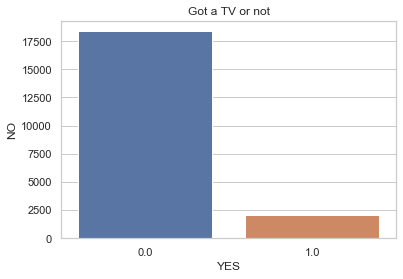

In [4]:
## Create X (features) and y(response)
X_features = df.drop('got_a_TV', axis=1)
# display(X_features.head())
y_target = df.got_a_TV
# display(y_target.head())

## is_cancelled

plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="got_a_TV", data=df)
plt.title('Got a TV or not')
plt.xlabel('YES')
plt.ylabel('NO')

# checking frequncy of target classes
y_target.value_counts()

In [5]:
# ## Splitiing hotel datasets into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, 
                                                    random_state=0, stratify=y_target)

print ("Dimension of Training Dataset: ", X_train.shape)
# print(X_train.head())
print ("Dimension of Testing Dataset: ", X_test.shape)
# print(X_test.head())

Dimension of Training Dataset:  (14308, 21)
Dimension of Testing Dataset:  (6132, 21)


In [6]:
""" List of numerical and categorical columns """
def num_cat(df):
    
    num_int_type = df.select_dtypes(include='int64').columns.tolist()
    num_float_type = df.select_dtypes(include='float64').columns.tolist()
    num_type = num_int_type + num_float_type

    cat_object_type = df.select_dtypes(include='object').columns.tolist()
    
    return num_type, cat_object_type

num_type_tn, cat_obj_type_tn = num_cat(X_train)
print("Features of Train Dataset:\n")
print(num_type_tn, cat_obj_type_tn)
num_type_tt, cat_obj_type_tt = num_cat(X_test)
print("\n\nFeatures of Test Dataset:\n")
print(num_type_tt, cat_obj_type_tt)

Features of Train Dataset:

['female', 'email', 'live_with_parents', 'education', 'previously_shoped', 'member', 'promotion', 'shop_competitor', 'require_financing', 'did_a_purchase', 'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing', 'amount_purchase', 'nb_electronics', 'age', 'monthly_spent_electronics'] ['work', 'family', 'state']


Features of Test Dataset:

['female', 'email', 'live_with_parents', 'education', 'previously_shoped', 'member', 'promotion', 'shop_competitor', 'require_financing', 'did_a_purchase', 'promotions_used', 'LT_clients', 'prize_amount', 'amount_financing', 'amount_purchase', 'nb_electronics', 'age', 'monthly_spent_electronics'] ['work', 'family', 'state']


In [7]:
""" 
    - Preprocessing datasets for modeling
    - Scaling and encoding  
"""
## Encoding categoirical variables to numeric type - understandable to machine learning model
## scaling numerical variables with mean "0" and standard devaition "1"

def num_cat_transformer(num_type, cat_object_type):
    # Preprocessing for numerical features:
    num_transformer = make_pipeline(StandardScaler(),
                                    SimpleImputer(strategy='constant'))

    # Preprocessing for categorical features:
    cat_transformer = make_pipeline(SimpleImputer(strategy='constant'),
                                    OneHotEncoder(sparse=True, handle_unknown='ignore'))

    ## Transforming both numerical and catergorical columns based preprocessing above
    column_transformer = make_column_transformer((num_transformer, num_type),
                                                   (cat_transformer, cat_object_type))
    return column_transformer

column_transformer_tn = num_cat_transformer(num_type_tn, cat_obj_type_tn)
X_train = pd.DataFrame(column_transformer_tn.fit_transform(X_train))
print("Ecnoded and Scaled of the Train dataset ")
display(X_train.head())

X_test = pd.DataFrame(column_transformer_tn.transform(X_test))
print("Ecnoded and Scaled of the Test dataset ")
display(X_test.head())


Ecnoded and Scaled of the Train dataset 


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.915494,0.578857,-0.651452,0.857953,-0.305312,-0.576597,-0.826736,-0.736191,1.749660,0.229854,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.092306,-1.727543,-0.651452,0.196766,-0.305312,-0.576597,-0.826736,1.358344,1.749660,-4.350583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.092306,0.578857,-0.651452,-1.125607,-0.305312,-0.576597,1.209576,1.358344,-0.571539,0.229854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.092306,0.578857,-0.651452,0.196766,-0.305312,-0.576597,-0.826736,-0.736191,-0.571539,0.229854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.092306,0.578857,1.535032,0.857953,-0.305312,-0.576597,-0.826736,-0.736191,-0.571539,0.229854,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Ecnoded and Scaled of the Test dataset 


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-1.092306,0.578857,1.535032,0.857953,-0.305312,-0.576597,-0.826736,-0.736191,1.749660,0.229854,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.092306,0.578857,-0.651452,0.857953,-0.305312,1.734313,1.209576,-0.736191,-0.571539,0.229854,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.092306,0.578857,-0.651452,0.857953,-0.305312,-0.576597,1.209576,-0.736191,-0.571539,0.229854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.915494,0.578857,1.535032,1.519140,-0.305312,1.734313,1.209576,-0.736191,-0.571539,0.229854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.092306,0.578857,1.535032,-1.125607,-0.305312,-0.576597,1.209576,-0.736191,-0.571539,0.229854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# # add missing columns to test dataset with all values being 0
# for i in X_train.columns:
#     if i not in X_test.columns: X_test[i] = 0
# print("Checking the no. of columns in test dataset")
# display(X_test.head())

# # add missing columns to train dataset with all values being 0
# for i in X_test.columns:
#     if i not in X_train.columns: X_train[i] = 0
# print("\nChecking the no. of columns in test dataset")
# display(X_train.head())

# # use the same column order for the test set as for train
# X_test = X_test.reindex(X_train.columns, axis=1)
# display(X_test.head())

In [9]:
""" Functions """


"""  Imbalance dataset - upsampling """
def upsampling_data(X, y):
    # Upsampling the training set
    # Upsample using SMOTE
    sm = SMOTE(sampling_strategy='auto', random_state=42)
    X_sm, y_sm = sm.fit_sample(X_train, y_train)
    return X_sm, y_sm

""" Training Model """
def train_model(model, X, y, num_procs, metrics):
    
    # split1 = KFold(n_splits=5, shuffle=False, random_state=None)
    split2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
    # get cross validation score for each model:
    cv_score = cross_val_score(model, 
                                 X, y, 
                                 cv=split2,
                                 scoring=metrics,
                                 n_jobs=-1).mean()
    return cv_score
    
    
""" Summary of the Model """
def print_summary(model, mean_score, std_dev):
    print('\nModel:\n', model)
    print('Cross validation accuarcy score: ', mean_score[model])
    print('Standard deviation during CV: ', std_dev[model])
    
    
""" Model Prediction """
def model_predict(model, X_train, y_train, X_topredict, y_true):    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_topredict)
    precision_metrics = precision_score(y_true, y_pred)
#     conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix = plot_confusion_matrix(model, X_topredict, y_true, cmap='Blues')
    return precision_metrics, conf_matrix.confusion_matrix

===================== Beginning cross validation ================== 

Model: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
metrics from CV: 0.875
metrics from test set:  0.132 
Confusion Matrix:
 [[4777  738]
 [ 505  112]]


Model: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
metrics from CV: 0.6
metrics from test set:  0.132 
Confusion Matrix:
 [[3356 2159

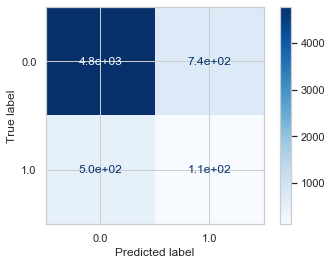

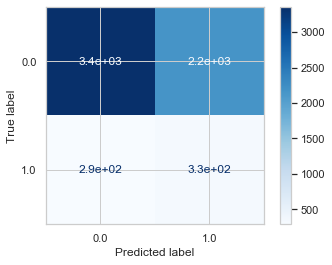

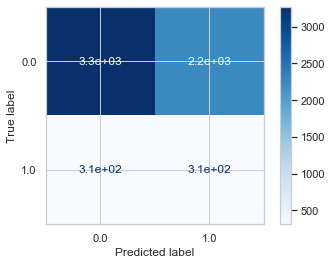

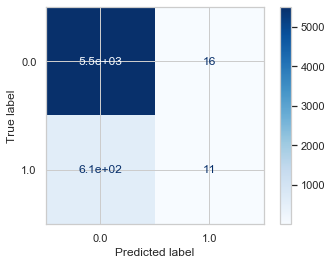

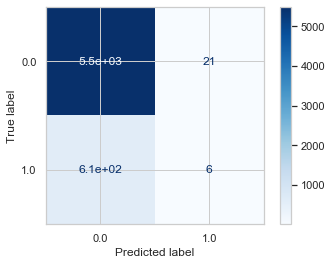

In [10]:

"""
    Evaluating Models
    - Decision Trees
    - Logistic Regression
    - Naive Bayes
    - Neural Network
    - Gradient Boosting
    - Random Forest

"""

# intialize the model list and dicts
models = []

# define number of processes to run in parallel
num_procs = 2

# shared model parameters
verbose_lvl = 0

# create models  
DT_model = DecisionTreeClassifier(random_state=42)
Logreg_model = LogisticRegression(random_state=42,n_jobs=-1)
GNM_model = GaussianNB()
# MLP_model = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200,
                                   max_features='auto' , max_depth=5, subsample=0.8)
rf_model = RandomForestClassifier(random_state=42)


# list all models
models.extend([DT_model, Logreg_model, GNM_model, gb_model, rf_model])


# parallel cross-validate models, using mean accuracy as evaluation metric, and print summaries
print("===================== Beginning cross validation ================== ")
for model in models:
    print("\nModel: \n", model)
    # Calling train_model()
    X_train_sm, y_train_sm = upsampling_data(X_train, y_train)
    cv_score = train_model(model, X_train_sm, y_train_sm, num_procs,'precision')
    print("metrics from CV:", round(cv_score, 3))
    metrics, conf_matrix  = model_predict(model, X_train_sm, y_train_sm, X_test, y_test)
    print("metrics from test set: ",round(metrics, 3), "\nConfusion Matrix:\n", conf_matrix)
    print("==================================================================================\n")


## Feature Importance


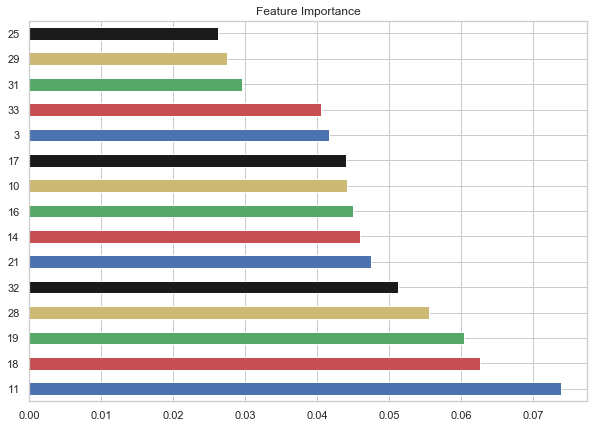

In [11]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train_sm.columns)

from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(feat_importances)))
plt.figure(figsize = (10, 7))
feat_importances.nlargest(15).plot(kind='barh', color=my_colors, title = 'Feature Importance')

# feat_importances.nlargest(15).sns.countplot()
plt.show()

In [12]:
import sklearn
sklearn.__version__

'0.22.1'

In [13]:
## Best chosen model from cross-validation
model = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {
    'alpha': [0.005, 0.007, 0.0001],
    'momentum':[0.5, 0.7, 0.9]
    }

In [16]:
grid_clf = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
grid_clf.fit(X_train, y_train);

grid_clf.best_params_

{'alpha': 0.0001, 'momentum': 0.9}

In [17]:
print("Best MLP-Clasifier from grid search: %f" % grid_clf.best_estimator_.score(X_test, y_test))

Best MLP-Clasifier from grid search: 0.892205


[[5462   53]
 [ 608    9]]


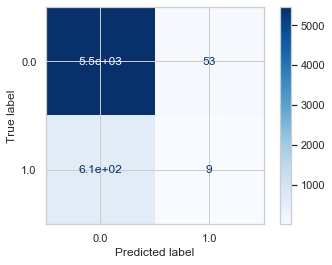

In [22]:
# pass it a trained model: it makes predictions for X_test and compares them to y_test
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(grid_clf, X_test, y_test, cmap='Blues')
print(disp.confusion_matrix)